<a href="https://colab.research.google.com/github/leonardooliveiraoficial/mba-data-projects/blob/main/projeto_credito/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## O que este notebook faz:

Este notebook segue exatamente as etapas pedidas no enunciado:

1. **Definição do problema** (texto)  
2. **Coleta de dados** (upload/leitura do CSV com `pandas`)  
3. **Exploração e tratamento** (preview, `describe`, remoção de idades ⩽ 0, tratamento de nulos)  
4. **Modelo Naive Bayes (GaussianNB)**: treino, teste, acurácia e **matriz de confusão**  
5. **Validação cruzada (10 folds)**: média e desvio padrão da acurácia, com explicação

---
## 1) Definição do problema

**Questão de negócio:** prever se um cliente **irá inadimplir** (não pagará) um empréstimo, com base em suas características (renda, idade e valor da dívida).

**Tipo de problema:** trata-se de um **problema de classificação binária** (classes `0 = pagou` e `1 = não pagou`).  
O objetivo é treinar um modelo que **classifique** novos clientes como `inadimplentes (1)` ou `adimplentes (0)`.

**Problema de pesquisa:** _“Dadas variáveis socioeconômicas simples (renda, idade e dívida), qual a performance de um classificador probabilístico (Naive Bayes) para prever inadimplência?”_

---
## 2) Coleta de dados (Upload e Leitura)

Você pode usar **uma** das opções abaixo no Colab:

- **(A) Upload direto:** `ícone de pasta` ➜ `upload (seta para cima)` ➜ selecione `dados de credito.csv`.  
  Depois leia com `pd.read_csv('nome_do_arquivo.csv')`.

- **(B) Google Drive:** monte o Drive e aponte para o caminho do arquivo.

> A base possui as colunas equivalentes a: `cliente`, `renda`, `idade`, `divida`, `inadimplencia`.  
> Alguns CSVs podem vir com nomes em inglês (`income`, `age`, `loan`, `default`) — o código abaixo **padroniza** automaticamente.

In [14]:
# = Instalação/Importação de bibliotecas =

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import unicodedata

pd.set_option('display.max_columns', None)
print('Versões: pandas', pd.__version__)

Versões: pandas 2.2.2


In [15]:
# = Leitura do CSV =
# Upload direto no Colab:
# from google.colab import files
# uploaded = files.upload()
# filename = list(uploaded.keys())[0]  # pega o nome do arquivo enviado
# df = pd.read_csv(filename)

df = pd.read_csv('dados de credito.csv')

print('Linhas x Colunas:', df.shape)
df.head()

Linhas x Colunas: (2000, 5)


,cliente,renda,idade,divida,inadimplencia
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


from matplotlib import pyplot as plt
_df_16['cliente'].plot(kind='hist', bins=20, title='cliente')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['renda'].plot(kind='hist', bins=20, title='renda')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['idade'].plot(kind='hist', bins=20, title='idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['divida'].plot(kind='hist', bins=20, title='divida')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='cliente', y='renda', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='renda', y='idade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='idade', y='divida', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='divida', y='inadimplencia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cliente']
  ys = series['renda']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('cliente', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cliente')
_ = plt.ylabel('renda')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cliente']
  ys = series['idade']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('cliente', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cliente')
_ = plt.ylabel('idade')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cliente']
  ys = series['divida']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('cliente', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cliente')
_ = plt.ylabel('divida')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cliente']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cliente'}, axis=1)
              .sort_values('cliente', ascending=True))
  xs = counted['cliente']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('cliente', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cliente')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_28['cliente'].plot(kind='line', figsize=(8, 4), title='cliente')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['renda'].plot(kind='line', figsize=(8, 4), title='renda')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['idade'].plot(kind='line', figsize=(8, 4), title='idade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['divida'].plot(kind='line', figsize=(8, 4), title='divida')
plt.gca().spines[['top', 'right']].set_visible(False)

### Padronização de nomes de colunas

A base pode vir com nomes diferentes (português/inglês). O bloco abaixo:
- remove acentos e coloca tudo em minúsculas;
- tenta mapear para os nomes canônicos: `cliente`, `renda`, `idade`, `divida`, `inadimplencia`.

In [16]:
# = Normalização dos nomes de coluna =

def strip_accents(s: str) -> str:
    return ''.join(c for c in unicodedata.normalize('NFKD', s) if not unicodedata.combining(c))

original_cols = list(df.columns)
norm_cols = [strip_accents(c).strip().lower().replace(' ', '_') for c in original_cols]

df.columns = norm_cols

# Mapeamentos possíveis -> canônicos

candidates = {
    'cliente': ['cliente','client','clientid','client_id','customer','customerid','id'],
    'renda': ['renda','income','annual_income'],
    'idade': ['idade','age'],
    'divida': ['divida','debt','loan','loan_amount','valor_divida'],
    'inadimplencia': ['inadimplencia','default','defaulted','paid','target']
}

rename_map = {}
for canon, opts in candidates.items():
    for col in df.columns:
        if col in opts:
            rename_map[col] = canon

df = df.rename(columns=rename_map)

print('Colunas originais:', original_cols)
print('Colunas normalizadas:', list(df.columns))

required = {'renda','idade','divida','inadimplencia'}
missing = required - set(df.columns)
if missing:
    raise ValueError(f'Colunas obrigatórias ausentes após normalização: {missing}\n'
                     f'Verifique os nomes do seu CSV.')

# Converte tipos numéricos quando possível

for c in ['renda','idade','divida','inadimplencia']:
    df[c] = pd.to_numeric(df[c], errors='coerce')

df.head()

Colunas originais: ['cliente', 'renda', 'idade', 'divida', 'inadimplencia']
Colunas normalizadas: ['cliente', 'renda', 'idade', 'divida', 'inadimplencia']


,cliente,renda,idade,divida,inadimplencia
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


---
## 3) Exploração e tratamento dos dados

### (A) Primeiras linhas
### (B) Últimas linhas
### (C) Estatísticas descritivas com `describe()`

In [18]:
# (A) Primeiras linhas

display(df.head())

# (B) Últimas linhas

display(df.tail())

# (C) Estatísticas descritivas

display(df.describe())

,cliente,renda,idade,divida,inadimplencia
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


,cliente,renda,idade,divida,inadimplencia
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0
1999,2000,69436.579552,56.152617,7378.833599,0


,cliente,renda,idade,divida,inadimplencia
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


from matplotlib import pyplot as plt
_df_44['cliente'].plot(kind='hist', bins=20, title='cliente')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_45['renda'].plot(kind='hist', bins=20, title='renda')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_46['idade'].plot(kind='hist', bins=20, title='idade')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_47['divida'].plot(kind='hist', bins=20, title='divida')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_48.plot(kind='scatter', x='cliente', y='renda', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_49.plot(kind='scatter', x='renda', y='idade', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_50.plot(kind='scatter', x='idade', y='divida', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_51.plot(kind='scatter', x='divida', y='inadimplencia', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_52['cliente'].plot(kind='line', figsize=(8, 4), title='cliente')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_53['renda'].plot(kind='line', figsize=(8, 4), title='renda')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_54['idade'].plot(kind='line', figsize=(8, 4), title='idade')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_55['divida'].plot(kind='line', figsize=(8, 4), title='divida')
plt.gca().spines[['top', 'right']].set_visible(False)

### Tratamento de idades inconsistentes (≤ 0)

(A) Verificar quantas idades ≤ 0.  
(B) Remover essas linhas gerando `df3`.  
(C) Conferir novamente.

In [19]:
# (A) Verificar idades <= 0

qtd_invalidas = (df['idade'] <= 0).sum()
print('Quantidade de idades <= 0:', int(qtd_invalidas))

# (B) Remover e criar df3

df3 = df[df['idade'] > 0].copy()

# (C) Conferir

print('Linhas x Colunas (df3):', df3.shape)
(qtd_invalidas, df.shape, df3.shape)

Quantidade de idades <= 0: 3
Linhas x Colunas (df3): (1994, 5)


(np.int64(3), (2000, 5), (1994, 5))

### Tratamento de valores faltantes

(A) Quantidade de nulos por coluna: `df3.isnull().sum()`  
(B) **Responda com o código:**  
> "Como posso remover todas as linhas que possuem valores ausentes em um DataFrame chamado 'df3' usando o método dropna()?"  
(C) Repetir `df3.isnull().sum()` para conferir.

In [20]:
# (A) Nulos por coluna

df3.isnull().sum()

,0
cliente,0
renda,0
idade,0
divida,0
inadimplencia,0


In [11]:
# (B) Remover linhas com qualquer valor ausente

df3 = df3.dropna().copy()

print('Após dropna -> Linhas x Colunas:', df3.shape)

Após dropna -> Linhas x Colunas: (1994, 5)


In [21]:
# (C) Conferir novamente

df3.isnull().sum()

,0
cliente,0
renda,0
idade,0
divida,0
inadimplencia,0


---
## 4) Construção e Avaliação de um Modelo Naive Bayes

- **Variáveis de entrada (X):** `renda`, `idade`, `divida`  
- **Alvo (y):** `inadimplencia`  
- **Split:** 80% treino / 20% teste, `random_state=42`  
- **Modelo:** `GaussianNB`  
- **Métrica principal:** Acurácia  
- **Também:** Matriz de confusão + breve explicação

Distribuição de classes (y):
inadimplencia
0    1711
1     283
Name: count, dtype: int64
Acurácia no conjunto de teste: 0.9098


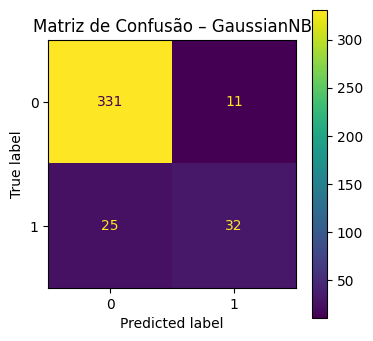

(array([[331,  11],
        [ 25,  32]]),
 0.9097744360902256)

In [22]:
# = Preparação dos dados =

X = df3[['renda','idade','divida']].copy()
y = df3['inadimplencia'].astype(int).copy()

print('Distribuição de classes (y):')
print(y.value_counts(dropna=False))

# = Divisão treino/teste =
# Usa estratificação se possível (evita desbalanceamento no split)

try:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
except ValueError:

    # Se estratificar falhar (ex.: só uma classe), faz split sem estratificação

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

# = Treino do modelo =

clf = GaussianNB()
clf.fit(X_train, y_train)

# = Avaliação =

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'Acurácia no conjunto de teste: {acc:.4f}')

# = Matriz de confusão =

cm = confusion_matrix(y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
fig, ax = plt.subplots(figsize=(4,4))
disp.plot(ax=ax, values_format='d')
plt.title('Matriz de Confusão – GaussianNB')
plt.show()

cm, acc

**Explicação (matriz de confusão):**  
- **Verdadeiro Negativo (TN)**: clientes corretamente previstos como `0` (pagaram).  
- **Falso Positivo (FP)**: clientes previstos como `1` (não pagaram), mas na verdade eram `0`.  
- **Falso Negativo (FN)**: clientes previstos como `0`, mas na verdade eram `1` (não pagaram).  
- **Verdadeiro Positivo (VP)**: clientes corretamente previstos como `1` (não pagaram).

Uma boa performance busca **maximizar TN e VP** e **minimizar FP e FN**. Dependendo do contexto do banco, FP e FN têm custos diferentes (ex.: **FN** pode ser mais grave, pois libera crédito a quem não pagará).

---
## 5) Validação cruzada (10 folds)

A **validação cruzada** avalia o modelo de forma mais robusta, dividindo os dados em **k** partes (aqui, `k=10`). Em cada iteração, treina-se em `k-1` partes e testa-se na parte restante, rotacionando até cobrir todos os folds. Isso reduz a dependência de um único split e dá uma **estimativa mais estável da performance**.

A seguir, calculamos a **média** e o **desvio padrão** da acurácia nos 10 folds.

In [23]:
# = Validação cruzada (10 folds) =

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(GaussianNB(), X, y, cv=cv, scoring='accuracy')

print('Acurácias por fold:', scores)
print(f'Média da acurácia: {scores.mean():.4f}')
print(f'Desvio padrão: {scores.std():.4f}')

Acurácias por fold: [0.94       0.905      0.915      0.93       0.93467337 0.92462312
 0.94472362 0.91457286 0.92964824 0.90954774]
Média da acurácia: 0.9248
Desvio padrão: 0.0127
